In [32]:
# Initialize Otter
import otter
grader = otter.Notebook("lab11.ipynb")

### Content Warning
This lab includes a discussion about cancer. If you feel uncomfortable with this topic, **please contact your TA, the instructors, or reach out via the [extenuating circumstances form](https://docs.google.com/forms/d/e/1FAIpQLSe23BU7DocByEPYt6YV00rOTn7K1AVj7Fqpw2eOgWG0Q5GtDw/viewform).**

# Lab 11: Logistic Regression

In this lab, we will manually construct the logistic regression model and minimize cross-entropy loss using `scipy.minimize`. This structure mirrors the linear regression labs from earlier in the semester and lets us dive deep into how logistic regression works. We also introduce the `sklearn.linear_model.LogisticRegression` module that you would use in practice, and we explore performance metrics for classification.

To receive credit for a lab, answer all questions correctly and submit before the deadline.

You must submit this assignment to Gradescope by the on-time deadline, **Tuesday, April 22, 11:59 PM PT**. Please read the syllabus for the Slip Day policy. As a reminder, slip days are **not** applicable on labs. **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to contact staff for submission support. 

### Lab Walk-Through
In addition to the lab notebook, we have also released a prerecorded walk-through video of the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the video.

**Note**: The walkthrough video is recorded from Spring 2023. Note that in these videos, we used `sklearn` `LogisticRegression`'s `solver` parameter; however, we'll use the `penalty` parameter for this semester. 

**Full Video Link**: click [**here**](https://www.youtube.com/watch?v=75hj59nas-M) for all the parts of the lab

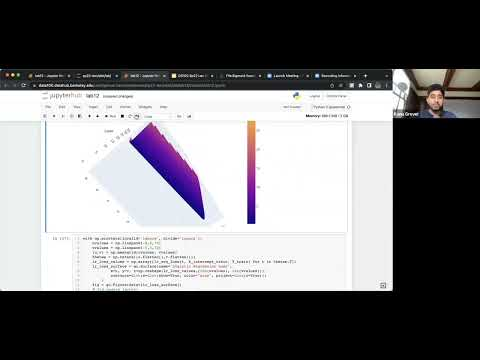

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo("75hj59nas-M")

### Discussion 12 Mini-lecture

In Data 100, discussions will not reserve time to host mini-lectures. Instead, we will release a set of pre-recorded mini-lectures that supplement the concepts introduced in lecture. The week after a mini-lecture is released, the topics will be covered in discussion. Thus, it is important to watch these mini-lectures **before** attending the discussion section you are assigned to. Discussion 12 mini-lecture is attached below.

In [34]:
YouTubeVideo("fseH10rEg3w", list = 'PLQCcNQgUcDfoUXRtrHc9TUx2pBYNfToVN')

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

---

### Debugging Guide
If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Jupyter notebooks / Datahub, Gradescope, common SQL errors, and more.

In [35]:
# Run this cell to set up your notebook; no further action is needed.
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go


%matplotlib inline
sns.set()
sns.set_context("talk")

<br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Data Loading

We will explore a breast cancer dataset from the University of Wisconsin ([source](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))). This dataset can be loaded using the `sklearn.datasets.load_breast_cancer()` method.  

In [36]:
# Run this cell to load the data; no further action is needed.
data = sklearn.datasets.load_breast_cancer()

# Data is a dictionary.
print(data.keys())
print(data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

<br/>

Since the data format is a dictionary, we will perform some preprocessing to create a `DataFrame`.

In [37]:
# Run this cell to see the first five rows of the data; no further action is needed.
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The prediction task for this data is to predict whether a tumor is benign or malignant (a binary decision), given the characteristics of that tumor. The prediction labels are stored in the field `data.target`. To put the data back in its original context, we will create a new column called `"malignant"` which will be 1 if the tumor is malignant and 0 if it is benign (reversing the definition of `target`).

In this lab, we will fit a simple **classification model** to predict breast cancer from the cell nuclei of a breast mass. For simplicity, we will work with only one feature: the `mean radius` which corresponds to the size of the tumor. Our output (i.e., response) is the `malignant` column.

In [38]:
# Run this cell to define X and Y; no further action is needed.

# Target data_dict['target'] = 0 is malignant 1 is benign
df['malignant'] = (data.target == 0).astype(int)

# Define our features/design matrix X
X = df[["mean radius"]]
Y = df['malignant']

<br/>

Before we go further, we will split our dataset into training and testing sets. This lets us explore the prediction power of our trained classifier on both seen and unseen data.

In [39]:
# Run this cell to create a 75-25 train-test split; no further action is needed. 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
print(f"Training Data Size: {len(X_train)}")
print(f"Test Data Size: {len(X_test)}")

Training Data Size: 426
Test Data Size: 143


<br/>
<hr style="border: 1px solid #fdb515;" />

# Part 1: Defining the Model

In these first two parts, you will manually build a logistic regression classifier.

Recall that the Logistic Regression model is written as follows:

$$p = \Large f_{\theta}(x) = \sigma ( x^T \theta)$$

where $f_{\theta}(x)= P(Y=1 | x)$ is the probability that our observation belongs to class 1, and $\sigma$ is the sigmoid activation function:

$$\Large \sigma(z) = \frac{1}{1 + e^{-z}}$$

If we have a single feature, then $x$ is a scalar and our model has parameters $\theta^T = [\theta_0 \ \ \theta_1]$ as follows:

$$\Large f_{\theta}(x) = \sigma (\theta_0 + \theta_1 x)$$

Therefore just like OLS, if we have $n$ data points and $d$ features, then we can construct the design matrix
$$\Large \mathbb{X} \in \mathbb{R}^{n \times (d + 1)}$$
with an all-ones column. Run the below cell to construct `X_intercept_train`. The syntax should look familiar:

In [40]:
# Run this cell to add the bias column; no further action is needed.
def add_bias_column(X):
    return np.hstack([np.ones((len(X), 1)), X])

X_intercept_train = add_bias_column(X_train)
X_intercept_train.shape

(426, 2)

<br/>

---

### Question 1a

Using the above definition for $\mathbb{X}$, we can also construct a matrix representation of our Logistic Regression model, just like we did for OLS. Noting that $\theta^T = [\theta_0 \ \ \theta_1\ \ \dots \ \ \theta_d$], the vector $\hat{\mathbb{Y}}$ is:

$$\Large \hat{\mathbb{Y}} = \sigma(\mathbb{X} \theta) $$

Then the $i$-th element of $\hat{\mathbb{Y}}$ is the probability that the $i$-th observation belongs to class 1, given the feature vector is the $i$-th row of design matrix $\mathbb{X}$, and the parameter vector $\theta$.

Below, implement the `lr_model` function to evaluate this expression. To matrix-multiply two `numpy` arrays, use `@` or `np.dot`. In case you're interested, the [matmul documentation](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) contrasts the two methods.



In [41]:
def sigmoid(z):
    """
    The sigmoid function is defined for you.
    """
    return 1 / (1 + np.exp(-z))

def lr_model(theta, X):
    """
    Returns the logistic regression model as defined above.
    You should not need to use a for loop; use @ or np.dot.
    
    Args:
        theta: The model parameters. Dimension (d+1,).
        X: The design matrix. Dimension (n, d+1).
    
    Return:
        Probabilities that Y = 1 for each data point.
        Dimension (n,).
    """
    z = np.dot(X, theta)
    return sigmoid(z)

In [42]:
grader.check("q1a")

q1a results: All test cases passed!

<br/>

---

###  Question 1b: Compute Empirical Risk
Now let's try to analyze the cross-entropy loss from logistic regression. Suppose for a single observation, we predict probability $p$ that the true response $y$ is in class 1 (otherwise the prediction is 0 with probability $1 - p$). The cross-entropy loss is $-log(p)$ when $y=1$ and $-log(1-p)$ when $y=0$. More concretely:

$$ \text{CE Loss} = - \left( y \log(p) + (1 - y) \log(1 - p) \right)$$

For the logistic regression model, the **empirical risk** is therefore defined as the average cross-entropy loss across all $n$ data points:

$$R(\theta) = -\frac{1}{n} \sum_{i=1}^n \left( y_i \log(\sigma(X_i^T \theta)) + (1 - y_i) \log(1 - \sigma(X_i^T \theta))  \right) $$

Where $y_i$ is the $i-$th response in our dataset, $\theta$ are the parameters of our model, $X_i^T$ is the $i$-th row of our design matrix $\mathbb{X}$, and $\sigma(X_i^T \theta)$ is the probability that the response is 1 given input $X_i$.

Below, implement the function `lr_loss` that computes empirical risk over the dataset. Feel free to use the functions defined in the previous part.

In [43]:
def lr_avg_loss(theta, X, Y):
    '''
    Compute the average cross-entropy loss using X, Y, and theta.
    You should not need to use a for loop. 

    Args:
        theta: The model parameters. Dimension (d+1,).
        X: The design matrix. Dimension (n, d+1).
        Y: The label. Dimension (n,).

    Return:
        The average cross-entropy loss.
    '''
    temp = lr_model(theta, X)
    loss = (Y * np.log(temp)) + ((1-Y) * (np.log(1 - temp)))
    empirical_risk = -np.mean(loss)
    return empirical_risk

In [44]:
grader.check("q1b")

q1b results: All test cases passed!

<br/>

Below is an interactive plot showing the average training cross-entropy loss for various values of $\theta_0$ and $\theta_1$ (respectively x and y axis in the plot). You may receive a `Javascript Error: Something went wrong with axis scaling` error. If your image does not show up, there are two potential workarounds: (1) run the following cell below to generate a static version of the plot and check out the interactive plot in the walkthrough video, or (2) restart your kernel (upper left menu -> `Kernel` -> `Restart Kernel and Run up to Selected Cell...`). 

In [45]:
# Run this cell to create the plotly visualization. 
# If this gives a  Javascript Error, run the cell below instead. 
with np.errstate(invalid='ignore', divide='ignore'):
    uvalues = np.linspace(-8,8,70)
    vvalues = np.linspace(-5,5,70)
    (u,v) = np.meshgrid(uvalues, vvalues)
    thetas = np.vstack((u.flatten(),v.flatten()))
    lr_avg_loss_values = np.array([lr_avg_loss(t, X_intercept_train, Y_train) for t in thetas.T])
    lr_loss_surface = go.Surface(name="Logistic Regression Loss",
            x=u, y=v, z=np.reshape(lr_avg_loss_values,(len(uvalues), len(vvalues))),
            contours=dict(z=dict(show=True, color="gray", project=dict(z=True)))
        )
    fig = go.Figure(data=[lr_loss_surface])
    fig.update_layout(
        scene = dict(
            xaxis_title='theta_0',
            yaxis_title='theta_1',
            zaxis_title='Loss'),
            width=700,
            margin=dict(r=20, l=10, b=10, t=10))
    py.iplot(fig)

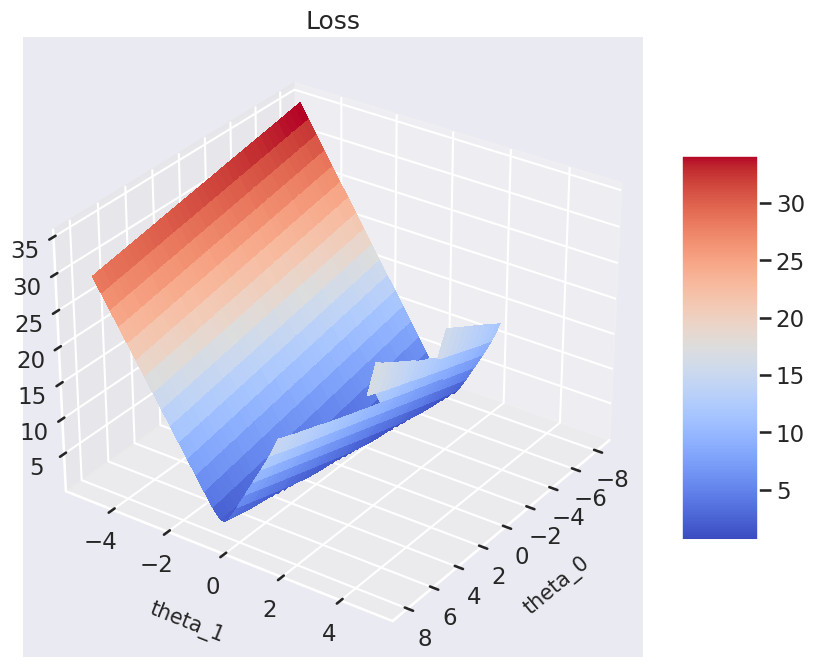

In [46]:
# Run this cell to create the plotly visualization; no further action is required. 
from matplotlib import cm

with np.errstate(invalid='ignore', divide='ignore'):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
    
    uvalues = np.linspace(-8,8,70)
    vvalues = np.linspace(-5,5,70)
    u,v = np.meshgrid(uvalues, vvalues)
    thetas = np.vstack((u.flatten(),v.flatten()))
    lr_avg_loss_values = np.array([lr_avg_loss(t, X_intercept_train, Y_train) for t in thetas.T])


    # Plot the surface.
    surf = ax.plot_surface(u, v, np.reshape(lr_avg_loss_values,(len(uvalues), len(vvalues))), 
                           cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Set the azimuth and elevation angles
    ax.view_init(azim=35, elev=30)
    
    # customize 
    plt.xlabel('theta_0', fontsize=15, labelpad=15)
    plt.ylabel('theta_1', fontsize=15, labelpad=15)
    plt.title('Loss')
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    

<!-- BEGIN QUESTION -->

<br/>

---

### Question 1c
Describe one interesting observation about the loss plot above.


One interesting observation about the loss plot above is that there is no unique minimizer, meaning that there exists multiple values where the parameter experiences a local minima.

<!-- END QUESTION -->

<br/>
<hr style="border: 1px solid #fdb515;" />

# Part 2: Fit and Predict

### [Tutorial] `scipy.optimize.minimize`

The next two cells call the `minimize` function from `scipy` on the `lr_avg_loss` function you defined in the previous part. We pass in the training data to `args` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)) to find the `theta_hat` that minimizes the average cross-entropy loss over the training set.

In [47]:
# Run this cell to minimize lr_avg_loss using scipy; no further action is needed.
from scipy.optimize import minimize

min_result = minimize(lr_avg_loss,
                      x0=np.zeros(X_intercept_train.shape[1]),
                      args=(X_intercept_train, Y_train))
min_result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.3123767645012965
        x: [-1.387e+01  9.372e-01]
      nit: 16
      jac: [-4.098e-07 -7.369e-06]
 hess_inv: [[ 7.482e+02 -5.214e+01]
            [-5.214e+01  3.684e+00]]
     nfev: 57
     njev: 19

In [48]:
# Run this cell to print `theta_hat`; no further action is needed.
theta_hat = min_result['x']
theta_hat

array([-13.87178304,   0.93723892])

<br/>

Because our design matrix $\mathbb{X}$ leads with a column of all ones, `theta_hat` has two elements: $\hat{\theta}_0$ is the estimate of the intercept/bias term, and $\hat{\theta}_1$ is the estimate of the slope of our single feature.

<br/>

### Recap:
* For logistic regression with the parameter vector $\theta$, $P(Y = 1 | x) = \sigma(x^T \theta)$, where $\sigma$ is the sigmoid function and $x$ is a feature vector. Therefore $\sigma(x^T \theta)$ is the probability that the response is 1 given the feature is $x$. Otherwise the response is 0 with probability $P(Y = 0 | x) = 1 - \sigma(x^T \theta)$.
* The $\hat{\theta}$ *minimizes* average cross-entropy loss of our training data.

The main takeaway is that logistic regression models **probabilities** of classifying data points as 1 or 0. Next, we use this takeaway to implement model predictions.

<br/>

---

## Question 2

Using the `theta_hat` estimate above, we can construct a **decision rule** for classifying a data point with observation $x$. Let $P(Y = 1 | x) = \sigma(x^T \hat{\theta})$:

$$ \text{classify}(x) = \begin{cases} 
1, &\quad\text{if}\ \  P(Y = 1 | x) \geq 0.5 \\ 
0, &\quad\text{if}\ \ P(Y = 1 | x) < 0.5 
\end{cases}$$

This decision rule has a decision **threshold** $T = 0.5$. This threshold means that we treat the classes $0$ and $1$ "equally." Lower thresholds mean that we are more likely to predict $1$, whereas higher thresholds mean that we are more likely to predict $0$.

<br/>

Implement the `lr_predict` function below, which returns a vector of predictions according to the logistic regression model. The function  takes a design matrix of observations `X`, parameter estimate `theta`, and decision threshold `threshold` with a default value of 0.5.

In [49]:
def lr_predict(theta, X, threshold=0.5):
    '''
    Classification using a logistic regression model
    with a given decision rule threshold.

    Args:
        theta: The model parameters. Dimension (d+1,)
        X: The design matrix. Dimension (n, d+1).
        threshold: Decision rule threshold for predicting class 1.

    Return:
        A vector of predictions.
    '''
    
    return lr_model(theta, X) >= threshold

# Do not modify below this line.
Y_train_pred = lr_predict(theta_hat, X_intercept_train)
Y_train_pred

array([False, False, False,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False,

In [50]:
grader.check("q2")

q2 results: All test cases passed!

<br/>

### [Tutorial] Linearly separable data

How do these predicted classifications compare to the true responses $\mathbb{Y}$?

Run the cell below to visualize our predicted responses, the true responses, and the probabilities we used to make predictions. We use `sns.stripplot` which introduces some jitter to avoid overplotting.

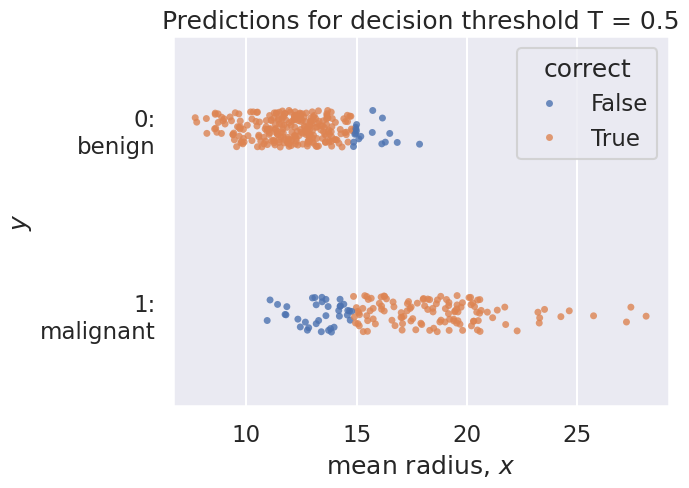

In [51]:
# Run this cell to generate the visualization; no further action is needed.
plot_df = pd.DataFrame({"X": np.squeeze(X_train),
                        "Y": Y_train,
                        "Y_pred": Y_train_pred,
                        "correct": (Y_train == Y_train_pred)})
sns.stripplot(data=plot_df, x="X", y="Y", orient='h', alpha=0.8, hue="correct")
plt.xlabel('mean radius, $x$')
plt.ylabel('$y$')
plt.yticks(ticks=[0, 1], labels=['0:\nbenign', '1:\nmalignant'])
plt.title("Predictions for decision threshold T = 0.5")
plt.show()

<br/>

Because we are using a decision threshold $T = 0.5$, we predict $1$ for all $x$ where our predicted probability $\sigma(x^T\theta)$ is greater than or equal to 0.5. Writing this out mathematically and solving for $x^T\theta$: 
\begin{align}
\frac{1}{1+e^{-x^T\theta}} &= \frac{1}{2} \\ 
2 &= 1 + e^{-x^T\theta} \\
1 &= e^{-x^T\theta} \\
log(1)  &= log(e^{-x^T\theta})  \\
0 &= -x^T\theta  \\
\end{align}

We see that our decision threshold is when $x^T\theta = 0$. For the single mean radius feature, we can use algebra to solve for the boundary to be approximately $x \approx 14.8$. We can see this by substituting for $\theta = \hat{\theta}$ in the equation above:
$$x^T\hat{\theta} = 0 $$
$$
\begin{matrix}\begin{bmatrix}1 & x\end{bmatrix}\\\mbox{}\end{matrix}\begin{bmatrix} \hat{\theta_0} \\ \hat{\theta_1} \end{bmatrix} = 0\\
$$

From the minimize function, we found that `theta_hat` is `array([-13.87178638,   0.93723916])`. Plugging for $\hat{\theta}$:

$$-13.87178638 +  0.93723916x = 0$$ 

$$x \approx 14.8$$


In other words, we will always predict $0$ (benign) if the mean radius feature is less than 14.8 and $1$ (malignant) otherwise. However, in our training data, there are data points with large mean radii that are benign and vice versa. Our data is not **linearly separable** by a vertical line.

The above visualization is useful when we have just one feature. In practice, however, we use other performance metrics to diagnose our model performance. Next, we will explore several metrics: accuracy, precision, recall, and confusion matrices.

<br/>
<hr style="border: 1px solid #fdb515;" />

# Part 3: Quantifying Performance



### [Tutorial] sklearn's `LogisticRegression`
Instead of using the model structure that we built manually in the previous questions, we will instead use `sklearn`'s `LogisticRegression` function, which operates similarly to the `sklearn` OLS, Ridge, and LASSO models.

Let's first fit a logistic regression model to the training data. Some notes: 
* Like with linear models, the `fit_intercept` argument specifies if the model includes an intercept term. We therefore pass in the original matrix `X_train` (defined at the beginning of the notebook, without intercept term) in the call to `lr.fit()`.
* `sklearn` fits an **L2 regularized** logistic regression model by default as specified in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more details. The `penalty` argument specifies the regularization penalty term. 

In [52]:
# Run this cell to fit a sklearn LogisticRegression model; no further action is needed. 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
        fit_intercept=True,
        penalty='l2')

lr.fit(X_train, Y_train)
lr.intercept_, lr.coef_

(array([-13.75289919]), array([[0.92881284]]))

<br/>

Note that because we are now fitting a regularized logistic regression model, the estimated coefficients above deviate slightly from our numerical findings in Question 1.

<br/>

Like with linear models, we can call `lr.predict(x_train)` to classify our training data with our fitted model.

In [53]:
# Run this cell to make predictions; no further action is needed. 
lr.predict(X_train)

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,

Note that for a binary classification task, the `sklearn` model uses an unadjustable decision rule of 0.5. If you're interested in manually adjusting this threshold, check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) for `lr.predict_proba()`.

<br/>

---

### Question 3a: Accuracy

Fill in the code below to compute the training and testing accuracy, defined as:

$$
\text{Training Accuracy} = \frac{1}{n_{train\_set}} \sum_{i \in {train\_set}} {\mathbb{1}_{y_i = \hat{y_i}}}
$$

$$
\text{Testing Accuracy} = \frac{1}{n_{test\_set}} \sum_{i \in {test\_set}} {\mathbb{1}_{y_i = \hat{y_i}}}
$$

where for the $i$-th observation in the respective dataset, $\hat{y_i}$ is the predicted response (class 0 or 1), and $y_i$ is the true response.  $\mathbb{1}_{y_i = \hat{y_i}}$ is an indicator function which is $1$ if ${y_i} = \hat{y_i}$ and $ 0$ otherwise.

In [54]:
train_accuracy = np.mean(lr.predict(X_train) == Y_train)
test_accuracy = np.mean(lr.predict(X_test) == Y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8709
Test accuracy: 0.9091


In [55]:
grader.check("q3a")

q3a results: All test cases passed!

<br/>

---

### Question 3b: Precision and Recall

It seems we can get a very high test accuracy. What about precision and recall?  
- **Precision** (also called positive predictive value) is the fraction of true positives among the total number of data points predicted as positive.  
- **Recall** (also known as sensitivity) is the fraction of true positives among the total number of data points with positive labels.

Precision measures the ability of our classifier to avoid predicting negative samples as positive (i.e., avoid false positives), while recall is the ability of the classifier to find all the positive samples (i.e., avoid false negatives).

Below is a graphical illustration of precision and recall, modified slightly from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall):

<img src="precision_recall.png" alt="precision_recall" width="600">

Mathematically, Precision and Recall are defined as:
$$
\text{Precision} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_positives}} = \frac{TP}{TP+FP}
$$

$$
\text{Recall} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_negatives}}=\frac{TP}{TP+FN}
$$

Use the formulas above to compute the precision and recall for the **test set** using the `lr` model trained using `sklearn`.

In [56]:
Y_test_pred = lr.predict(X_test)

# Y_test_pred --> shows all predicted values, whether they are true positives or not
precision = sum((Y_test_pred == Y_test) & (Y_test_pred == 1)) / sum(Y_test_pred)

# Y_test --> 1s and 0s
recall = sum((Y_test_pred == Y_test) & (Y_test_pred == 1)) / sum(Y_test)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.9184
recall = 0.8333


In [57]:
grader.check("q3b")

q3b results: All test cases passed!

<br/>

Our precision is fairly high, while our recall is a bit lower.

Consider the following plots, which display the distribution of the **response variable** $\mathbb{Y}$ in the training and test sets. Recall class labels are 0: benign, 1: malignant.

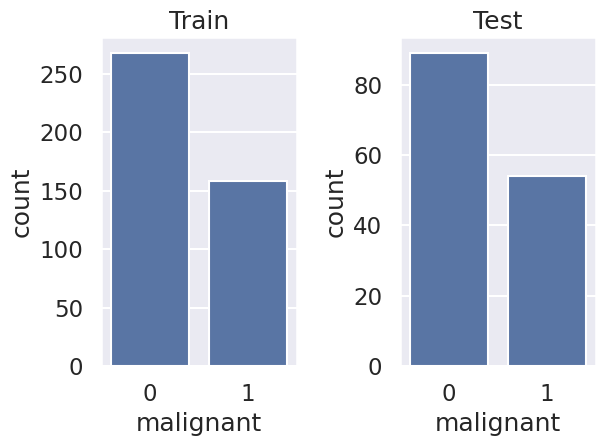

In [58]:
fig, axes = plt.subplots(1, 2)
sns.countplot(x=Y_train, ax=axes[0]);
sns.countplot(x=Y_test, ax=axes[1]);

axes[0].set_title('Train')
axes[1].set_title('Test')
plt.tight_layout();

<!-- BEGIN QUESTION -->

<br>

---

### Question 3c
Based on the above distribution, what might explain the observed difference between our precision and recall metrics?

The observed difference between precision and recall indicates that the model has high precision, meaning that when it predicts a positive case, it is usually correct. However, the low recall suggests that the model is missing many actual positive cases, resulting in a higher number of false negatives. This imbalance is likely due to the disproportionate representation of malignant and benign tumors in the training and test datasets.

<!-- END QUESTION -->

<br/>


### [Tutorial] Confusion Matrices

To understand the link between precision and recall, it's useful to create a **confusion matrix** of our predictions. Luckily, `sklearn.metrics` provides us with such a function!

The `confusion_matrix` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)) categorizes counts of data points based if their true and predicted values match.

For the 143-datapoint test dataset:

In [59]:
# Run this cell to define the confusion matrix; no further action is needed.
from sklearn.metrics import confusion_matrix

Y_test_pred = lr.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_test_pred)
cnf_matrix

array([[85,  4],
       [ 9, 45]])

We've implemented the following function to better visualize these four counts against the true and predicted categories:

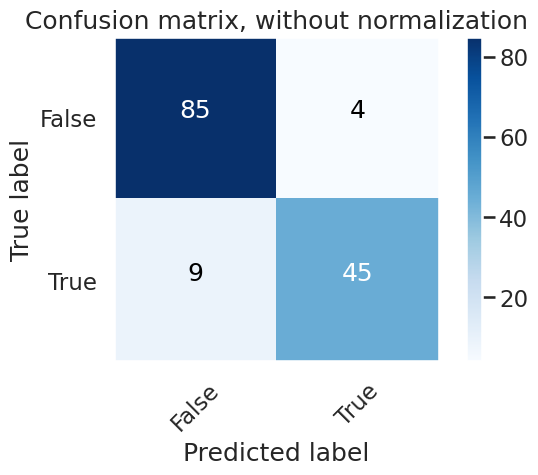

In [60]:
# Run this cell to plot the confusion matrix; no further action is needed.

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

<br>

---

### Question 3d: Normalized Confusion Matrix

To better interpret these counts, assign `cnf_matrix_norm` to a **normalized confusion matrix** by the count of each true label category.

In other words, build a 2-D `numpy` array constructed by normalizing `cnf_matrix` by the count of data points in each row. For example, the top-left quadrant of `cnf_matrix_norm` should represent the proportion of true negatives over the total number of data points with negative labels. 

**Hints**: 
* When adding values in a 2-D array `arr`, `arr.sum(axis=0)` will calculate the sum of the columns while `arr.sum(axis=1)` will calculate the sum of the rows. 
* In array broadcasting, you may encounter issues dividing 2-D `numpy` arrays by 1-D `numpy` arrays. 
    * Check out the `keepdims` parameter in `np.sum` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)), to preserve the dimensions of `cnf_matrix` after using `np.sum` on it.
    * Alternatively, add the dimension back using `np.newaxis` ([documentation](https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis)).

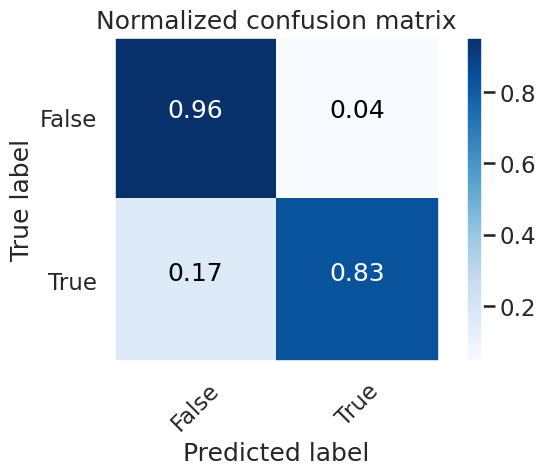

In [61]:
cnf_matrix_norm = cnf_matrix / np.sum(cnf_matrix, axis=1, keepdims=True)

# Do not modify below this line.
plot_confusion_matrix(cnf_matrix_norm, classes=class_names,
                       title='Normalized confusion matrix')

In [62]:
grader.check("q3d")

q3d results: All test cases passed!

<br/>

Compare the normalized confusion matrix to the values you computed for precision and recall earlier:

In [63]:
# Run this cell to see precision and recall again; no further action is needed.
print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.9184
recall = 0.8333


<br/>
Based on the definitions of precision and recall, why does only recall appear in the normalized confusion matrix? Why doesn't precision appear? (No answer required for this part; just something to think about.)

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You are finished with Lab 11!

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSenPfvkr0iHmkxD0v4bjEyo1iH2g0znEYe-OEkShrJikFkFfg/viewform). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Submit this file to the Lab 11 assignment on Gradescope. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...

